In [1]:
from langgraph.types import Command
import os
os.chdir("../")

In [2]:
from interviewBot.graph import build_graph, build_workflow

In [3]:
wf = build_workflow()
compiled_wf = wf.compile()

In [4]:
print("Nodes:", compiled_wf.nodes.keys())

Nodes: dict_keys(['__start__', 'init_sess_node', 'user_verify_interrupt_node', 'user_verify_node', 'questions_node', 'error_handler_node', 'get_answer_node', 'evaluate_node', 'difficulty_adaptive_node', 'report_node', 'finalizer_node'])


In [5]:
print(compiled_wf.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	init_sess_node(init_sess_node)
	user_verify_interrupt_node(user_verify_interrupt_node)
	user_verify_node(user_verify_node)
	questions_node(questions_node)
	error_handler_node(error_handler_node)
	get_answer_node(get_answer_node)
	evaluate_node(evaluate_node)
	difficulty_adaptive_node(difficulty_adaptive_node)
	report_node(report_node)
	finalizer_node(finalizer_node)
	__end__([<p>__end__</p>]):::last
	__start__ --> init_sess_node;
	difficulty_adaptive_node --> questions_node;
	error_handler_node -. &nbsp;end_graph&nbsp; .-> __end__;
	error_handler_node -. &nbsp;user_verify_node&nbsp; .-> user_verify_interrupt_node;
	evaluate_node -. &nbsp;adaptive&nbsp; .-> difficulty_adaptive_node;
	evaluate_node -. &nbsp;report&nbsp; .-> report_node;
	get_answer_node --> evaluate_node;
	init_sess_node --> user_verify_interrupt_node;
	questions_node --> get_answer_node;
	report_node --> finalizer_node;
	use

In [6]:
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod

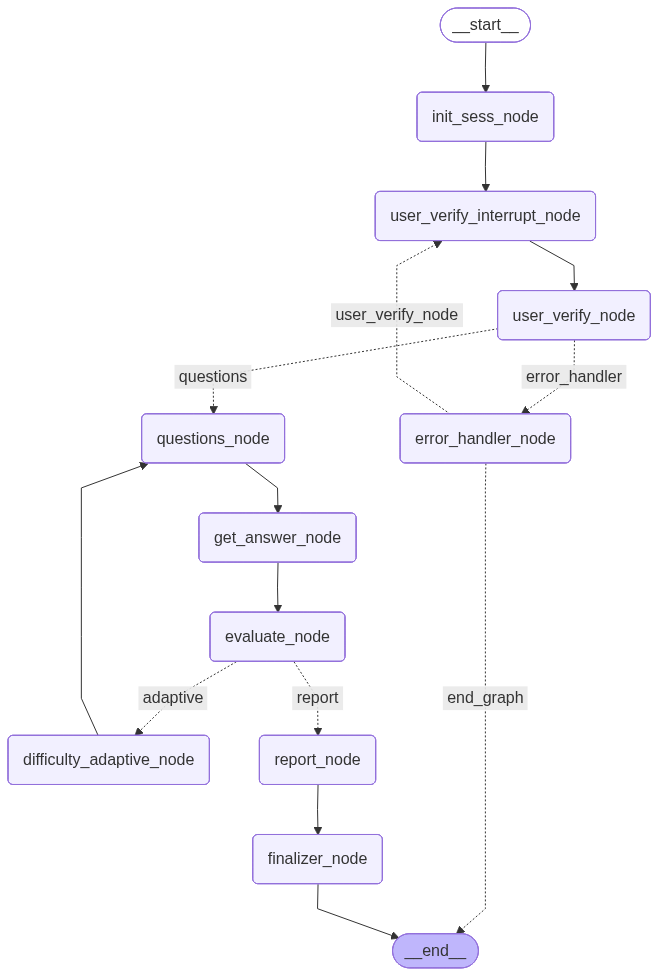

In [7]:
display(
    Image(
        compiled_wf.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [8]:
compiled = await build_graph()
result = await compiled.ainvoke({}, config={"configurable": {"thread_id": 7}})
print(result)

{'user_id': None, 'verified': None, 'verification_count': 0, 'difficulty': 5, 'question': None, 'expected_answer': None, 'answer_recieved': None, 'used_topics': [], 'question_count': 0, 'got_score': None, 'scores': [], 'difficulties': [5], 'evaluation': None, 'clarification_needed': False, 'clarifications_used': 0, 'answers_log': [], 'report': None, 'final_decision': None, 'final_message': None, '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='4e8f5e9f4b589c5f62206fe41cce8da3')]}


In [9]:
result

{'user_id': None,
 'verified': None,
 'verification_count': 0,
 'difficulty': 5,
 'question': None,
 'expected_answer': None,
 'answer_recieved': None,
 'used_topics': [],
 'question_count': 0,
 'got_score': None,
 'scores': [],
 'difficulties': [5],
 'evaluation': None,
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'report': None,
 'final_decision': None,
 'final_message': None,
 '__interrupt__': [Interrupt(value={'message': 'Please enter your Email ID or Employee ID for verification (You will have 2 tries):', 'interrupt_type': 'verification', 'field': 'user_id'}, id='4e8f5e9f4b589c5f62206fe41cce8da3')]}

In [10]:
result = await compiled.ainvoke(
    Command(resume = "rahulrawat272chd@gmail.com"), 
    config = {"configurable": {"thread_id": 7}}
)


[2025-09-16 22:37:30,521: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]


In [11]:
result

{'user_id': 'rahulrawat272chd@gmail.com',
 'verified': True,
 'verification_count': 1,
 'difficulty': 5,
 'question': 'Can you explain how to use the Solver tool in Excel to optimize a production schedule for a factory that has constraints on labor hours and material availability? Please provide a brief example of how you would set this up.',
 'expected_answer': 'To use Solver, first define your objective cell (e.g., maximize profit), then set your decision variable cells (e.g., quantities of products to produce). Next, add constraints (e.g., total labor hours <= available hours, total materials <= available stock). Finally, run Solver to find the optimal production quantities that meet all constraints.',
 'answer_recieved': None,
 'used_topics': ['Goal Seek and Solver in Decision Making'],
 'question_count': 1,
 'got_score': None,
 'scores': [],
 'difficulties': [5],
 'evaluation': None,
 'clarification_needed': False,
 'clarifications_used': 0,
 'answers_log': [],
 'report': None,
 '

In [12]:
result = await compiled.ainvoke(
    Command(resume = "I'd start by setting up the spreadsheet with profit as the objective function. For example, if Product A gives $40 profit and Product B gives $30 profit, I'd have an objective cell calculating total profit = (40 × units of A) + (30 × units of B). The decision variable cells would be the number of units of each product to produce. Then I'd add constraints like: total labor hours used ≤ available hours (e.g., 400), and total materials used ≤ available materials (e.g., 300). Finally, I'd open Solver, set the objective cell to maximize, changing the product quantity cells, subject to those constraints. Solver would then return the optimal mix of products to maximize profit while staying within the labor and material limits."), 
    config = {"configurable": {"thread_id": 7}}
)


[2025-09-16 22:38:34,153: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]
[2025-09-16 22:38:37,840: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]


In [13]:
result

{'user_id': 'rahulrawat272chd@gmail.com',
 'verified': True,
 'verification_count': 1,
 'difficulty': 6,
 'question': 'Can you explain the differences between VLOOKUP, INDEX-MATCH, and XLOOKUP in terms of their flexibility and use cases? When would you prefer to use one over the others?',
 'expected_answer': 'VLOOKUP is limited to searching from left to right and requires the lookup value to be in the first column. INDEX-MATCH allows for more flexibility by enabling lookups in any direction. XLOOKUP, the most versatile, can search both vertically and horizontally, and it handles errors more gracefully. I would prefer XLOOKUP for its simplicity and power, especially in complex datasets.',
 'answer_recieved': None,
 'used_topics': ['Goal Seek and Solver in Decision Making',
  'Use of VLOOKUP vs INDEX-MATCH vs XLOOKUP'],
 'question_count': 2,
 'got_score': None,
 'scores': [8],
 'difficulties': [5, 6],
 'evaluation': None,
 'clarification_needed': False,
 'clarifications_used': 0,
 'answe

In [14]:
result = await compiled.ainvoke(
    Command(resume = "VLOOKUP is simple and quick to use but limited because it can only search left to right. INDEX-MATCH is more flexible, as it can look in any direction and works better when columns get rearranged. XLOOKUP is the modern replacement, which allows both vertical and horizontal lookups, has built-in error handling, and is easier to read. I'd use VLOOKUP for small, simple tables, INDEX-MATCH if I need flexibility with column positions, and XLOOKUP for complex or modern spreadsheets where reliability and simplicity matter."), 
    config = {"configurable": {"thread_id": 7}}
)


[2025-09-16 22:39:34,524: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]
[2025-09-16 22:39:36,760: INFO: _client: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"]


In [15]:
result

{'user_id': 'rahulrawat272chd@gmail.com',
 'verified': True,
 'verification_count': 1,
 'difficulty': 7,
 'question': 'Can you explain the differences between VLOOKUP, INDEX-MATCH, and XLOOKUP in terms of their flexibility and use cases? When would you prefer to use one over the others?',
 'expected_answer': 'VLOOKUP is limited to searching from left to right and requires the lookup value to be in the first column. INDEX-MATCH allows for more flexibility by enabling lookups in any direction. XLOOKUP, the most versatile, can search both vertically and horizontally, and it handles errors more gracefully. I would prefer XLOOKUP for its simplicity and power, especially in complex datasets.',
 'answer_recieved': "VLOOKUP is simple and quick to use but limited because it can only search left to right. INDEX-MATCH is more flexible, as it can look in any direction and works better when columns get rearranged. XLOOKUP is the modern replacement, which allows both vertical and horizontal lookups,